In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import display, display_html

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv
/kaggle/input/covid19-global-dataset/worldometer_coronavirus_daily_data.csv
/kaggle/input/covid19-global-dataset/worldometer_coronavirus_summary_data.csv
/kaggle/input/netflix-shows/netflix_titles.csv


# ***Loading and Reading Dataset***

In [3]:
df_cv = pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")

df_cv

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11151,Zimbabwe,ZWE,2021-04-06,162633.0,139133.0,23500.0,17123.0,10967.0,1.09,0.94,0.16,738.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...
11152,Zimbabwe,ZWE,2021-04-07,179417.0,153238.0,26179.0,16784.0,12505.0,1.21,1.03,0.18,841.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...
11153,Zimbabwe,ZWE,2021-04-08,193677.0,166543.0,27134.0,14260.0,12624.0,1.30,1.12,0.18,849.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...
11154,Zimbabwe,ZWE,2021-04-09,206205.0,178237.0,27968.0,12528.0,11636.0,1.39,1.20,0.19,783.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...


In [4]:
print(colored("There are {} rows and {} columns in the dataset.".format(df_cv.shape[0],df_cv.shape[1]),attrs=['bold']))

There are 11156 rows and 15 columns in the dataset.


In [5]:
df_cv.columns.values

array(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million', 'vaccines', 'source_name',
       'source_website'], dtype=object)

****Iso_code, Source and Source website are not needed in this analysis since this is not a credibility analysis (data is deemed credible)****

In [6]:
df_cv.drop(['iso_code','source_name', 'source_website'], axis=1, inplace=True)
df_cv.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca


# Checking-for and Handling Missing Data

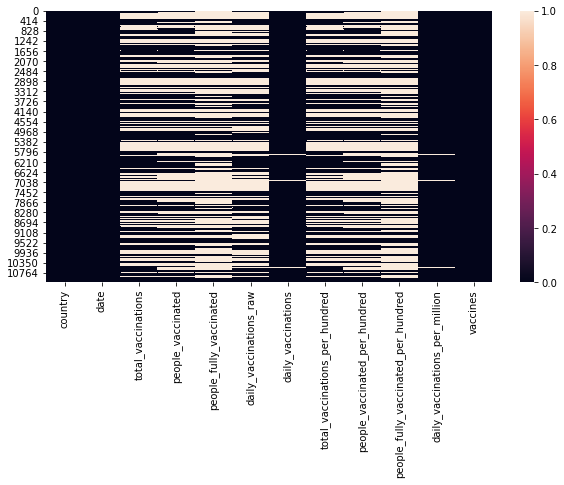

total_vaccinations's null rate :40.43%
people_vaccinated's null rate :46.33%
people_fully_vaccinated's null rate :61.6%
daily_vaccinations_raw's null rate :50.11%
daily_vaccinations's null rate :1.76%
total_vaccinations_per_hundred's null rate :40.43%
people_vaccinated_per_hundred's null rate :46.33%
people_fully_vaccinated_per_hundred's null rate :61.6%
daily_vaccinations_per_million's null rate :1.76%


In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df_cv.isnull())
plt.show()

for i in df_cv.columns:
    null_rate = df_cv[i].isna().sum() / len(df_cv) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

In [8]:
df_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11156 entries, 0 to 11155
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              11156 non-null  object 
 1   date                                 11156 non-null  object 
 2   total_vaccinations                   6646 non-null   float64
 3   people_vaccinated                    5987 non-null   float64
 4   people_fully_vaccinated              4284 non-null   float64
 5   daily_vaccinations_raw               5566 non-null   float64
 6   daily_vaccinations                   10960 non-null  float64
 7   total_vaccinations_per_hundred       6646 non-null   float64
 8   people_vaccinated_per_hundred        5987 non-null   float64
 9   people_fully_vaccinated_per_hundred  4284 non-null   float64
 10  daily_vaccinations_per_million       10960 non-null  float64
 11  vaccines                    

# **Converting Date Column into Date type, replace missing digital values with 0**

In [9]:
#checking the column labels types now
print(all(isinstance(column, str) for column in df_cv.columns))


df_cv['date'] = pd.to_datetime(df_cv['date'], format = '%Y-%m-%d')
df_cv = df_cv.replace([np.inf, -np.inf], np.nan)
df_cv = df_cv.fillna(0)
df_cv.head()

True


,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oxford/AstraZeneca
1,Afghanistan,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca
3,Afghanistan,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca
4,Afghanistan,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca


# Grouping by Country; since there are multiple data-entry for each country, it would make more sense to group them into one for global-scale analysis. grouping by mean takes care of the cumulative and ratio data.

In [10]:
df1_cv = df_cv.groupby(['country','vaccines'],as_index=False).mean()
df1_cv

,country,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,Oxford/AstraZeneca,4048.888889,4048.888889,0.000000,0.000000,2557.688889,0.010444,0.010444,0.000000,65.822222
1,Albania,"Pfizer/BioNTech, Sinovac",32226.516484,159.351648,25.450549,1869.857143,2519.527473,1.119890,0.005495,0.000879,875.450549
2,Algeria,Sputnik V,3410.454545,0.000000,0.000000,1.363636,3139.545455,0.007727,0.000000,0.000000,71.272727
3,Andorra,Pfizer/BioNTech,873.883117,288.870130,48.064935,0.000000,191.194805,1.130909,0.373896,0.062338,2474.532468
4,Angola,Oxford/AstraZeneca,16665.738095,16665.738095,0.000000,0.000000,5016.261905,0.050714,0.050714,0.000000,152.619048
...,...,...,...,...,...,...,...,...,...,...,...
171,Uzbekistan,Oxford/AstraZeneca,15303.500000,15303.500000,0.000000,0.000000,8364.000000,0.045000,0.045000,0.000000,249.833333
172,Venezuela,Sputnik V,2768.311111,2768.311111,0.000000,0.000000,1382.511111,0.009556,0.009556,0.000000,48.533333
173,Vietnam,Oxford/AstraZeneca,33353.147059,33353.147059,0.000000,1706.970588,1642.558824,0.034118,0.034118,0.000000,16.941176
174,Wales,"Oxford/AstraZeneca, Pfizer/BioNTech",933546.051020,785436.887755,148109.163265,20269.153061,20193.704082,29.609184,24.911633,4.697347,6404.867347


# ****The description of the new dataframe****

In [11]:
df1_cv.describe(include='all')

,country,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,176,176,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,176.000000,176.000000,176.000000,176.000000
unique,176,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Turks and Caicos Islands,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.379859e+06,9.071545e+05,2.813453e+05,3.845530e+04,4.432822e+04,5.377741,3.769256,1.131591,2536.247362
std,NaN,NaN,5.854424e+06,4.063846e+06,1.631983e+06,1.623292e+05,1.777405e+05,11.231356,7.966227,3.431201,5176.310936
min,NaN,NaN,3.571429e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,3.281484e+03,1.465824e+03,0.000000e+00,0.000000e+00,6.785185e+02,0.133735,0.059797,0.000000,245.504808
50%,NaN,NaN,3.788669e+04,2.034519e+04,7.621540e+02,1.109431e+03,4.217037e+03,1.316088,0.806774,0.028593,1088.938401
75%,NaN,NaN,3.977371e+05,2.756487e+05,4.966593e+04,1.351089e+04,1.854624e+04,5.993667,3.945969,0.907620,2361.911932


# Visualization

# What Vaccines are used in which countries, run cursor on map

In [12]:
fig = px.choropleth(df1_cv, locations='country',
                    locationmode='country names',
                    color='vaccines',
                    
                    width = 1500,
                    height= 600,
                     )
fig.update_layout( 
    # Set the name of the map 
    title_text='Vaccines used in different countries', # Hide the legend 
    showlegend=False, 
    # Determine the map display settings (remove the frame, etc.) 
)
fig.show()
 

In [13]:
# Grouping data by vaccines 
df2_vaccines = df1_cv.groupby('vaccines').count()['country'].reset_index().sort_values('country', ascending=False) 

# Select only the required columns 
df2_vaccines.columns = ['Vaccines', 'Number of countries using the Vaccine']

# Setting the formatting of the dataframe when displaying 
display(df2_vaccines.style.set_caption('Number of countries using vaccine-combination'))



,Vaccines,Number of countries using the Vaccine
8,Oxford/AstraZeneca,52
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",27
19,Pfizer/BioNTech,17
9,"Oxford/AstraZeneca, Pfizer/BioNTech",14
28,Sputnik V,9
24,Sinopharm/Beijing,8
21,"Pfizer/BioNTech, Sinovac",7
7,"Moderna, Pfizer/BioNTech",5
18,"Oxford/AstraZeneca, Sinovac",5
15,"Oxford/AstraZeneca, Sinopharm/Beijing",4


**Countries and Vaccination Combo**

In [14]:
df_vaccines = df1_cv[['vaccines', 'country']]
df1_vaccines = pd.DataFrame(df_vaccines.vaccines.str.split(',').tolist(), columns="vaccine_1 vaccine_2 vaccine_3 vaccine_4 vaccine_5".split())
df_vaccines = pd.merge(df_vaccines, df1_vaccines, left_index=True, right_index=True)
df_vaccines.set_index('country', inplace=True)
display(df_vaccines.tail(30))

,vaccines,vaccine_1,vaccine_2,vaccine_3,vaccine_4,vaccine_5
country,,,,,,
Slovakia,Pfizer/BioNTech,Pfizer/BioNTech,None,None,None,None
Slovenia,"Oxford/AstraZeneca, Pfizer/BioNTech",Oxford/AstraZeneca,Pfizer/BioNTech,None,None,None
Solomon Islands,Oxford/AstraZeneca,Oxford/AstraZeneca,None,None,None,None
South Africa,Johnson&Johnson,Johnson&Johnson,None,None,None,None
South Korea,"Oxford/AstraZeneca, Pfizer/BioNTech",Oxford/AstraZeneca,Pfizer/BioNTech,None,None,None
Spain,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,None,None
Sri Lanka,Oxford/AstraZeneca,Oxford/AstraZeneca,None,None,None,None
Sudan,Oxford/AstraZeneca,Oxford/AstraZeneca,None,None,None,None
Suriname,Oxford/AstraZeneca,Oxford/AstraZeneca,None,None,None,None


# Unique Vaccines and accumulated countries usage.

In [15]:
# We create a list of unique vaccines 
df3_vaccines = set([v.strip() for vac in df2_vaccines['Vaccines'].unique() for v in vac.split(',')]) 

# Transpose the dataframe and create a dictionary 
vaccine_dicts = df2_vaccines.T.to_dict().values()

# We create an empty dictionary where we will add the vaccine and the number of countries that use it 
dict_vaccine = {} 

# At each iteration, we take the name of the vaccine and count the number of countries that use it 
for vaccine in df3_vaccines: 
    counter_countries = 0 
    for vac in vaccine_dicts: 
        if vaccine in vac['Vaccines']: 
            counter_countries += list(vac.values())[-1] 
    dict_vaccine[vaccine] = counter_countries 
            
# We create a dataframe with the top vaccines by the number of countries that use them 
top_vaccine = pd.DataFrame([dict_vaccine], index=['Number of countries using vaccine']).T.sort_values('Number of countries using vaccine', ascending=False)
display(top_vaccine)

,Number of countries using vaccine
Oxford/AstraZeneca,118
Pfizer/BioNTech,85
Moderna,36
Sinopharm/Beijing,27
Sputnik V,24
Sinovac,19
Johnson&Johnson,2
Sinopharm/Wuhan,2
EpiVacCorona,1
Covaxin,1


**most Used Vaccine, (number of countries using a vaccine doesn't necessarily depict the number of people vaccinated by each vaccine)**

In [16]:
vaccine = df_cv.groupby(["vaccines"])['total_vaccinations'].max().reset_index()
vaccine.columns = ["Vaccines", "Total vaccinations"]
def draw_trace_bar(data, feature, title, xlab, ylab,color='Blue'):
    data = data.sort_values(feature, ascending=False)
    trace = go.Bar(
            x = data['Vaccines'],
            y = data[feature],
            marker=dict(color=color),
            text=data['Vaccines']
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=10,
                            color='black'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
              hovermode = 'closest',
              height = 800
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')


In [17]:
draw_trace_bar(vaccine, 'Total vaccinations', 'Most used Vaccine', 'Vaccine', 'Vaccination total', "brown" )

# I just aquired two new datasets covid world summary and covid daily data; first exploring the datasets and then merging with the vaccination data.

In [18]:
# Loading data 
df_cvsum = pd.read_csv('../input/covid19-global-dataset/worldometer_coronavirus_summary_data.csv')
df_cvv = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv') 
df_cvdaily = pd.read_csv('../input/covid19-global-dataset/worldometer_coronavirus_daily_data.csv')

# For the convenience of further work, we will create a list of dataframes data = [covid_summary, covid_daily, vaccination]
dfs = [df_cvsum, df_cvv, df_cvdaily]
display(dfs[0],dfs[2])

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,57364,2529.0,52005.0,2830.0,1124.0,1448,64.0,371724.0,9385.0,39607351
1,Albania,Europe,128518,2321.0,98269.0,27928.0,18.0,44697,807.0,585329.0,203569.0,2875341
2,Algeria,Africa,118645,3134.0,82704.0,32807.0,14.0,2668,70.0,230861.0,5192.0,44465491
3,Andorra,Europe,12581,121.0,11890.0,570.0,12.0,162625,1564.0,193595.0,2502456.0,77362
4,Angola,Africa,23549,554.0,22093.0,902.0,15.0,700,16.0,443086.0,13165.0,33655110
...,...,...,...,...,...,...,...,...,...,...,...,...
214,Wallis And Futuna Islands,Australia/Oceania,437,5.0,44.0,388.0,3.0,39426,451.0,1331.0,120083.0,11084
215,Western Sahara,Africa,10,1.0,8.0,1.0,NaN,16,2.0,NaN,NaN,608703
216,Yemen,Asia,5446,1068.0,2059.0,2319.0,23.0,180,35.0,22934.0,756.0,30334834
217,Zambia,Africa,90064,1227.0,88077.0,760.0,57.0,4795,65.0,1308716.0,69680.0,18781755


,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
92656,2021-4-08,Zimbabwe,37052.0,68.0,706.0,1532.0,1.0
92657,2021-4-09,Zimbabwe,37147.0,95.0,781.0,1535.0,3.0
92658,2021-4-10,Zimbabwe,37273.0,126.0,873.0,1538.0,3.0
92659,2021-4-11,Zimbabwe,37288.0,15.0,877.0,1538.0,0.0


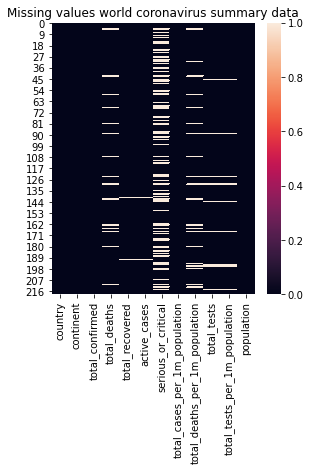

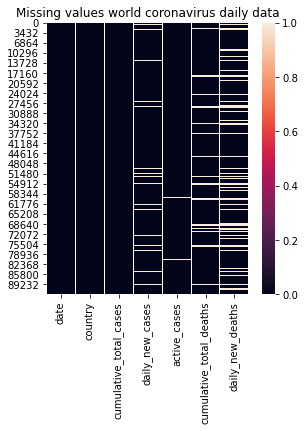

total_deaths's null rate :6.85% from world coronavirus SUMMARY data
total_recovered's null rate :0.91% from world coronavirus SUMMARY data
active_cases's null rate :0.91% from world coronavirus SUMMARY data
serious_or_critical's null rate :33.33% from world coronavirus SUMMARY data
total_deaths_per_1m_population's null rate :9.13% from world coronavirus SUMMARY data
total_tests's null rate :4.11% from world coronavirus SUMMARY data
total_tests_per_1m_population's null rate :4.11% from world coronavirus SUMMARY data
daily_new_cases's null rate :6.98% from world coronavirus DAILY data
active_cases's null rate :0.91% from world coronavirus DAILY data
cumulative_total_deaths's null rate :6.85% from world coronavirus DAILY data
daily_new_deaths's null rate :20.43% from world coronavirus DAILY data


In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(dfs[0].isnull())
plt.title('Missing values world coronavirus summary data')

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.heatmap(dfs[2].isnull())
plt.title('Missing values world coronavirus daily data')

plt.show()

for i in dfs[0].columns:
    null_rate = dfs[0][i].isna().sum() / len(dfs[0]) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}% from world coronavirus SUMMARY data".format(i,round(null_rate,2)))
print('=====================================')
for i in dfs[2].columns:
    null_rate = dfs[2][i].isna().sum() / len(dfs[2]) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}% from world coronavirus DAILY data".format(i,round(null_rate,2)))
        

**Checking for data type consistency**

In [ ]:
display(dfs[0].info(), dfs[2].info())